# Explore here

### Paso 1: Planteamiento del problema y recopilación de datos

In [1]:
# Your code here

import pandas as pd

AB_NYC_2019 = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv")
AB_NYC_2019.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


### Paso 2: Exploración y limpieza de datos

In [2]:
# Obtener las dimensiones
filas, columnas = AB_NYC_2019.shape
print(f"Filas: {filas}\nColumnas: {columnas}")

Filas: 48895
Columnas: 16


In [ ]:
# Obtener información sobre tipos de datos y valores no nulos
AB_NYC_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [4]:
# Checking for missing values
AB_NYC_2019.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [5]:
print(f"#1 Name: {AB_NYC_2019['name'].isnull().sum()}")
print(f"#3 Host name: {AB_NYC_2019['host_name'].isnull().sum()}")
print(f"#12 Last review: {AB_NYC_2019['last_review'].isnull().sum()}")
print(f"#13 Reviews per month: {AB_NYC_2019['reviews_per_month'].isnull().sum()}")

#1 Name: 16
#3 Host name: 21
#12 Last review: 10052
#13 Reviews per month: 10052


- For the float dtypes we are going to fill the missing values by mean(),
- for object we are going to fill missing values by mode(). 
- last_review is a date, so we need to convert it, then fill missing values from previous values.

Existen 48895 filas (air bnb´s)

Donde más nulos observamos son en las columnas #12 last_review y en la #13 reviews_per_month. En la columna #1 name y en la #3 host_name también se observan nulos.

Los datos cuentan con 6 características categóricas y 10 características numéricas.

In [6]:
# Son fechas por lo que las convertimos a datetime
AB_NYC_2019['last_review'] = pd.to_datetime(AB_NYC_2019.last_review)

In [7]:
print(f"#12 Last review: {AB_NYC_2019['last_review'].isnull().sum()}")

#12 Last review: 10052


In [7]:
# Last_review --> object (datetime => rellenamos con el valor de la anterior fila)
# Name --> object
# Host_name --> object
# Reviews_per_month --> float64


AB_NYC_2019['reviews_per_month'] = AB_NYC_2019['reviews_per_month'].fillna(AB_NYC_2019['reviews_per_month'].mean())


In [8]:
AB_NYC_2019['last_review'].ffill(inplace = True) # ffill() Replace NULL values with the value from the previous row:
# If True: the replacing is done on the current DataFrame. If False: returns a copy where the replacing is done.

/tmp/ipykernel_41773/2605191041.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  AB_NYC_2019['last_review'].ffill(inplace = True) # ffill() Replace NULL values with the value from the previous row:


In [9]:
# Checking for missing values
AB_NYC_2019.isnull().sum()

id                                 0
name                              16
host_id                            0
host_name                         21
neighbourhood_group                0
neighbourhood                      0
latitude                           0
longitude                          0
room_type                          0
price                              0
minimum_nights                     0
number_of_reviews                  0
last_review                        0
reviews_per_month                  0
calculated_host_listings_count     0
availability_365                   0
dtype: int64

In [10]:
print(AB_NYC_2019['name'].mode())
# Sustituimos los valores nulos de la columna "name"(object) por la moda (Hillside Hotel)
AB_NYC_2019['name'] = AB_NYC_2019['name'].fillna(AB_NYC_2019['name'].mode()[0])
# En la moda le indicamos un [0] porque nos devuelve un array
print(f"#1 Name: {AB_NYC_2019['name'].isnull().sum()}")

0    Hillside Hotel
Name: name, dtype: object
#1 Name: 0


In [11]:
print(AB_NYC_2019['host_name'].mode())
# Sustituimos los valores nulos de la columna "host_name"(object) por la moda (Michael)
AB_NYC_2019['host_name'] = AB_NYC_2019['host_name'].fillna(AB_NYC_2019['host_name'].mode()[0])
# En la moda le indicamos un [0] porque nos devuelve un array
print(f"#3 Host name: {AB_NYC_2019['host_name'].isnull().sum()}")

0    Michael
Name: host_name, dtype: object
#3 Host name: 0


In [17]:
AB_NYC_2019.isnull().sum()
# Aquí vemos como ya no tenemos nulos en ninguna columna

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [19]:
# describe() nos devuelve un resumen estadístico del dataframe
AB_NYC_2019.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,2018-10-14 06:10:06.540546304,1.373221,7.143982,112.781327
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,2011-03-28 00:00:00,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,2018-07-31 00:00:00,0.280000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,2019-05-25 00:00:00,1.220000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2019-06-24 00:00:00,1.580000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,2019-07-08 00:00:00,58.500000,327.000000,365.000000
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,NaN,1.497775,32.952519,131.622289


In [12]:
# Elimminamos las columnas que no necesitemos
AB_NYC_2019.drop(["id", "host_name", "name"], axis = "columns", inplace = True)

AB_NYC_2019.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


### Analysis of univariate variables

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

AB_NYC_2019.head()

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.210000,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.380000,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,2019-05-21,1.373221,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.640000,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.100000,1,0


- Analysis of numerical variables

array([[<Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'longitude'}>],
       [<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimum_nights'}>,
        <Axes: title={'center': 'number_of_reviews'}>],
       [<Axes: title={'center': 'last_review'}>,
        <Axes: title={'center': 'reviews_per_month'}>,
        <Axes: title={'center': 'calculated_host_listings_count'}>],
       [<Axes: title={'center': 'availability_365'}>, <Axes: >, <Axes: >]],
      dtype=object)

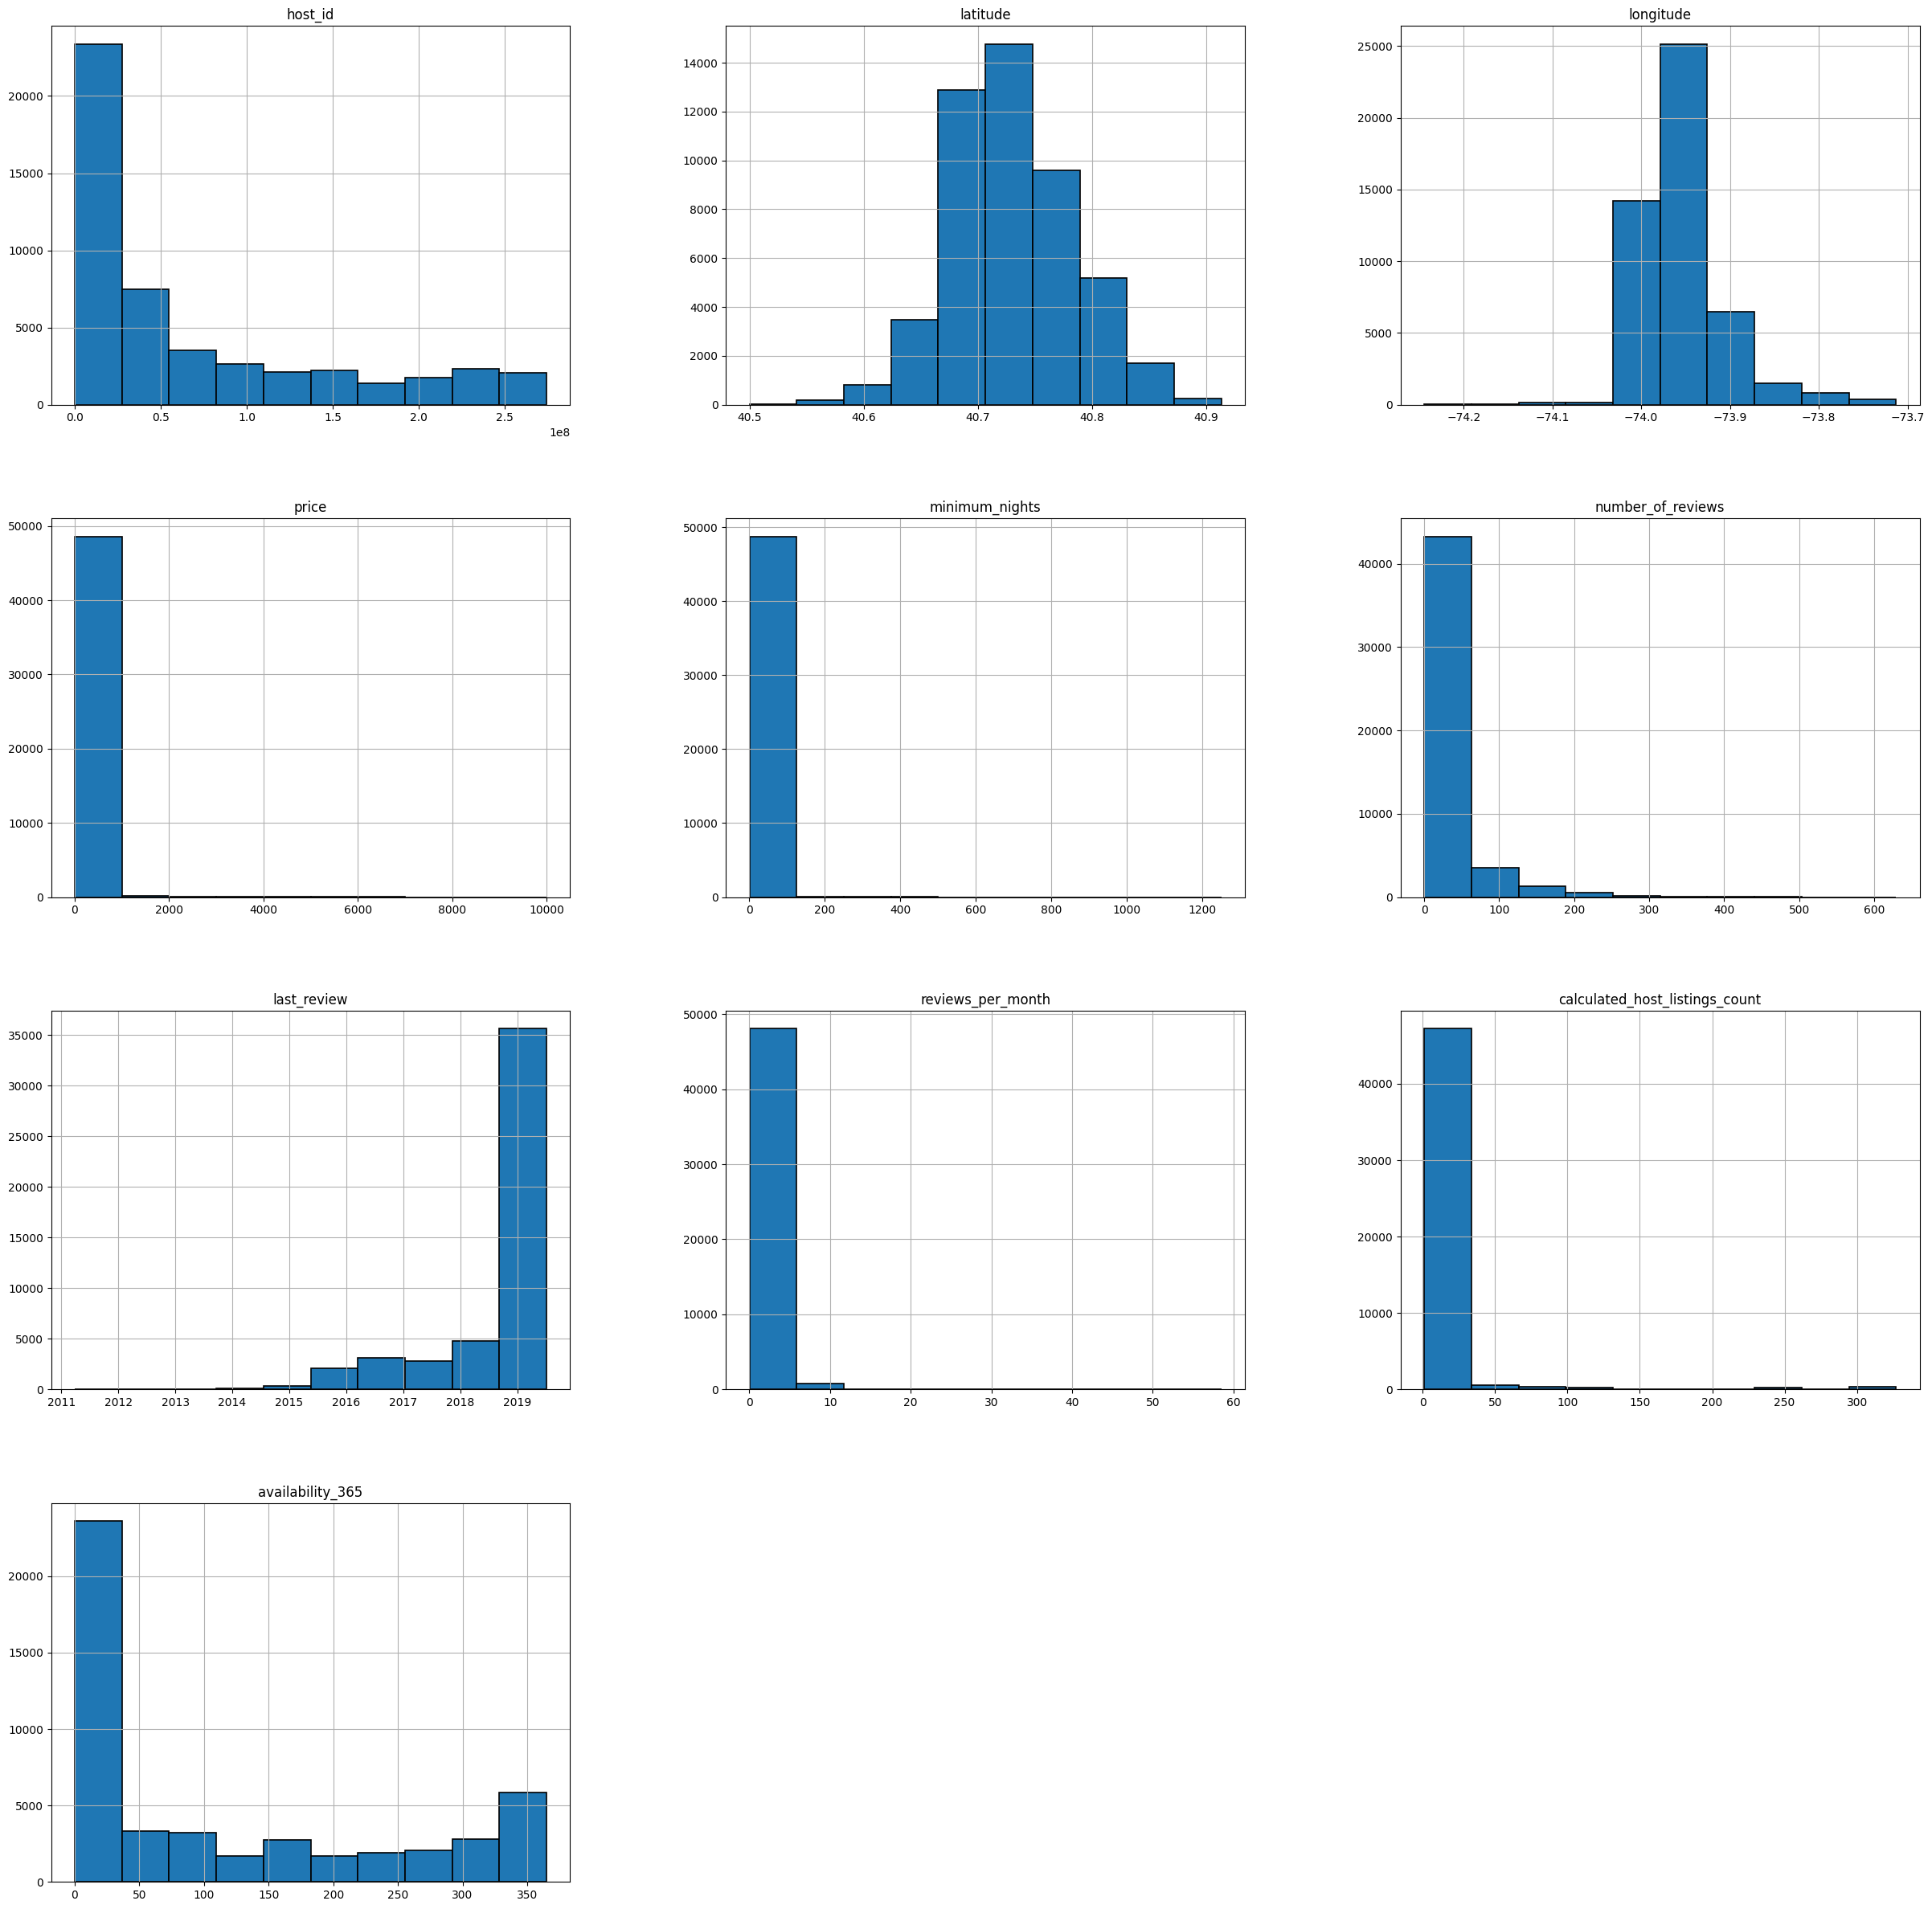

In [31]:
AB_NYC_2019.hist(edgecolor="black", linewidth=1.2, figsize=(30, 30))

<Figure size 3000x3000 with 0 Axes>

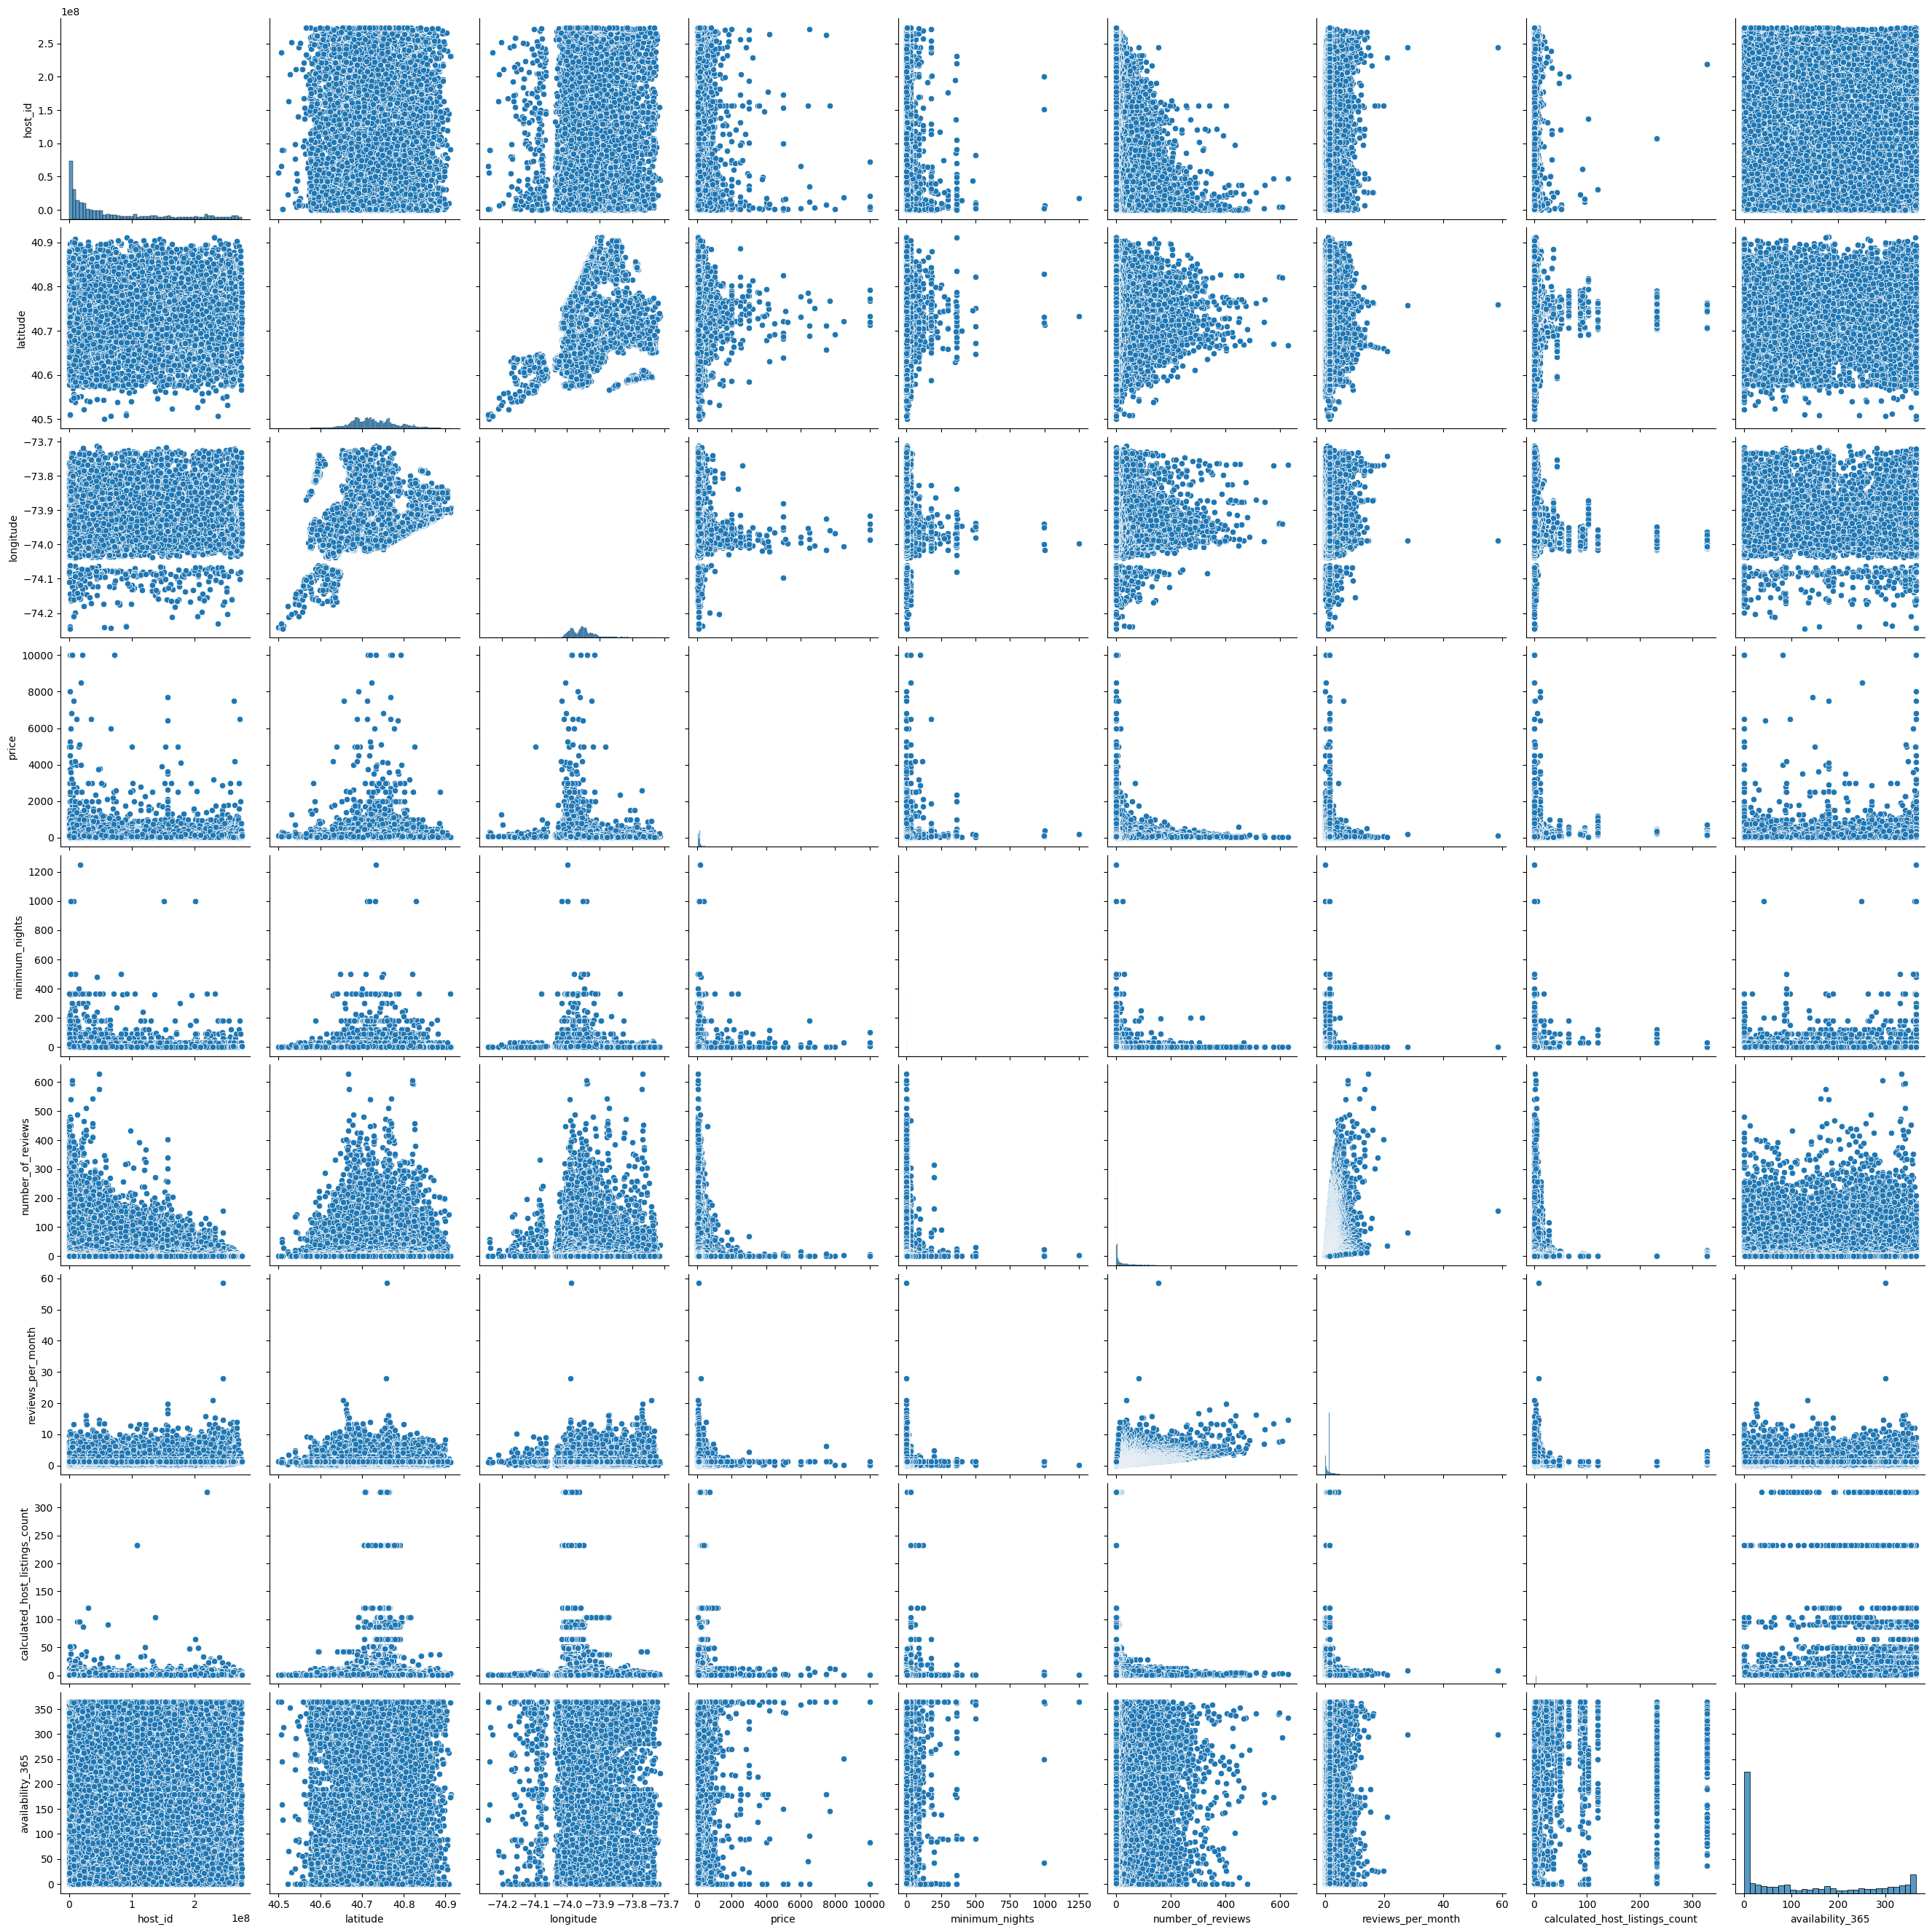

In [34]:
plt.figure(figsize = (30, 30))
sns.pairplot(AB_NYC_2019, height=3, diag_kind='hist')

In [14]:
AB_NYC_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   host_id                         48895 non-null  int64         
 1   neighbourhood_group             48895 non-null  object        
 2   neighbourhood                   48895 non-null  object        
 3   latitude                        48895 non-null  float64       
 4   longitude                       48895 non-null  float64       
 5   room_type                       48895 non-null  object        
 6   price                           48895 non-null  int64         
 7   minimum_nights                  48895 non-null  int64         
 8   number_of_reviews               48895 non-null  int64         
 9   last_review                     48895 non-null  datetime64[ns]
 10  reviews_per_month               48895 non-null  float64       
 11  ca

In [58]:
print("Categorical columns:")
for columns in AB_NYC_2019:
    if (AB_NYC_2019[columns].dtype) == 'object' :
        print(" ",columns)

Categorical columns:
  neighbourhood_group
  neighbourhood
  room_type


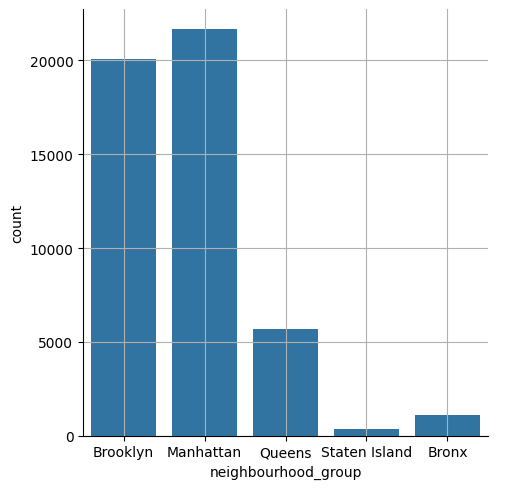

In [22]:
sns.catplot(x=AB_NYC_2019['neighbourhood_group'], kind='count')
plt.grid()

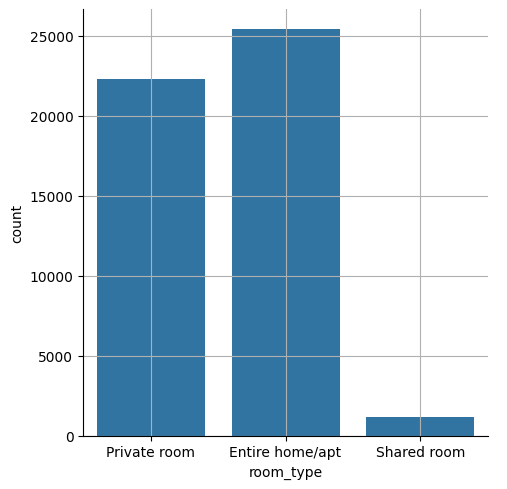

In [23]:
sns.catplot(x=AB_NYC_2019['room_type'], kind='count')
plt.grid()

<BarContainer object of 10 artists>

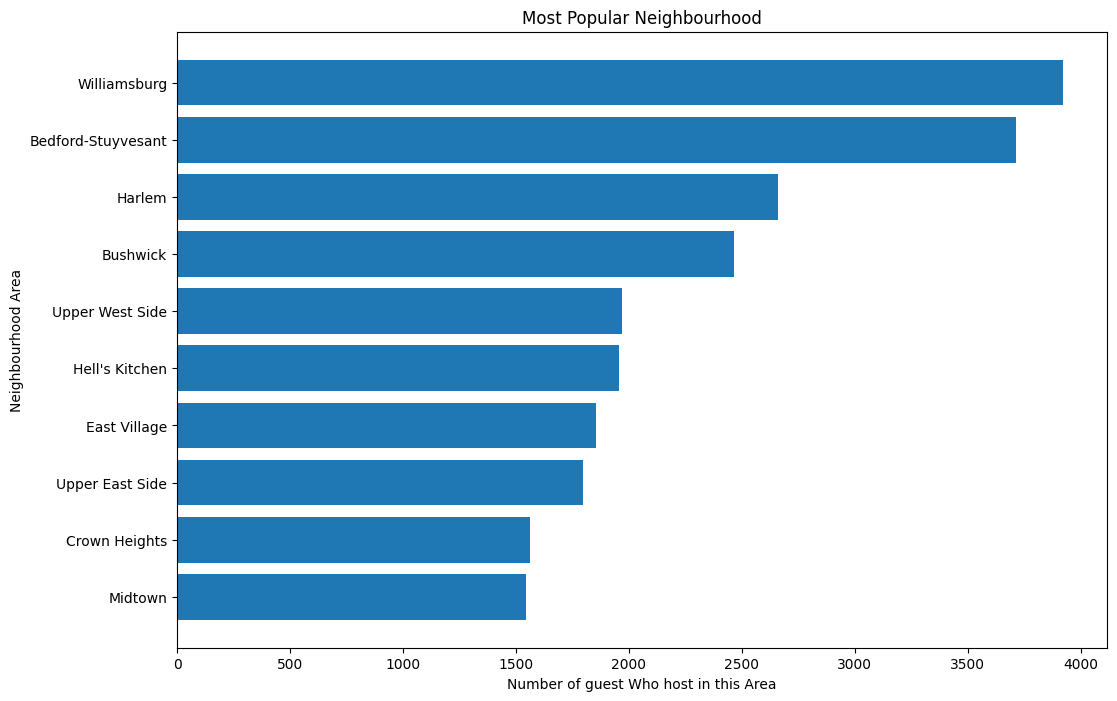

In [25]:
data = AB_NYC_2019.neighbourhood.value_counts()[:10]
plt.figure(figsize=(12, 8))
x = list(data.index)
y = list(data.values)
x.reverse()
y.reverse()

plt.title("Most Popular Neighbourhood")
plt.ylabel("Neighbourhood Area")
plt.xlabel("Number of guest Who host in this Area")

plt.barh(x, y)

In [28]:
print(f"Average of price per night: {AB_NYC_2019.price.mean():.2f} GBP")
print(f"Maximum price per night: {AB_NYC_2019.price.max()} GBP")
print(f"Minimum price per night: {AB_NYC_2019.price.min()} GBP")

Average of price per night: 152.72 GBP
Maximum price per night: 10000 GBP
Minimum price per night: 0 GBP


- vemos que hay algunas localizaciones por un precio de 0

# Correlation matrix